In [1]:
import os
import numpy as np

In [2]:
from qcodes.dataset import Measurement, plot_dataset
from qcodes.instrument import Instrument
from qcodes.validators import Arrays, Numbers

In [3]:
from qcodes.dataset import initialise_or_create_database_at, load_or_create_experiment
from qcodes.parameters import Parameter, ParameterWithSetpoints
import qcodes as qc
qc.logger.start_all_logging()

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\z5440260\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\z5440260\.qcodes\logs\230724-28608-qcodes.log


In [4]:
class GeneratedSetPoints(Parameter):
    """
    A parameter that generates a setpoint array from start, stop and num points
    parameters.
    """
    def __init__(self, startparam, stopparam, numpointsparam, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._startparam = startparam
        self._stopparam = stopparam
        self._numpointsparam = numpointsparam

    def get_raw(self):
        return np.linspace(self._startparam(), self._stopparam(),
                              self._numpointsparam())

class DummyArray(ParameterWithSetpoints):

    def get_raw(self):
        npoints = self.root_instrument.n_points.get_latest()
        return np.random.rand(npoints)


class DummySpectrumAnalyzer(Instrument):

    def __init__(self, name, **kwargs):

        super().__init__(name, **kwargs)


        self.add_parameter('f_start',
                           initial_value=0,
                           unit='Hz',
                           label='f start',
                           vals=Numbers(0,1e3),
                           get_cmd=None,
                           set_cmd=None)

        self.add_parameter('f_stop',
                           unit='Hz',
                           label='f stop',
                           vals=Numbers(1,1e3),
                           get_cmd=None,
                           set_cmd=None)

        self.add_parameter('n_points',
                           unit='',
                           initial_value=10,
                           vals=Numbers(1,1e3),
                           get_cmd=None,
                           set_cmd=None)

        self.add_parameter('freq_axis',
                           unit='Hz',
                           label='Freq Axis',
                           parameter_class=GeneratedSetPoints,
                           startparam=self.f_start,
                           stopparam=self.f_stop,
                           numpointsparam=self.n_points,
                           vals=Arrays(shape=(self.n_points.get_latest,)))

        self.add_parameter('spectrum',
                   unit='dBm',
                   setpoints=(self.freq_axis,),
                   label='Spectrum',
                   parameter_class=DummyArray,
                   vals=Arrays(shape=(self.n_points.get_latest,)))

In [5]:
tutorial_db_path = os.path.join(
    os.getcwd(), 'tutorial_paramter_with_setpoints.db')
initialise_or_create_database_at(tutorial_db_path)
load_or_create_experiment(
    experiment_name='tutorial_ParameterWithSetpoints', sample_name="no sample")

tutorial_ParameterWithSetpoints#no sample#1@C:\Users\z5440260\GitRepos\Arbok\arbok\examples\tutorial_paramter_with_setpoints.db
-------------------------------------------------------------------------------------------------------------------------------

In [6]:
a = DummySpectrumAnalyzer('foobar')

In [7]:
a.f_start(0)
a.f_stop(500)
a.n_points(501)

In [8]:
a.freq_axis.validate(a.freq_axis.get())

In [9]:
import IPython.lib.backgroundjobs as bg
from plottr.apps import inspectr

jobs = bg.BackgroundJobManager()
jobs.new(inspectr.main, qc.config.core.db_location)

<BackgroundJob #0: <function main at 0x000001DC040277E0>>

In [10]:
meas = Measurement()
meas.register_parameter(a.spectrum)

with meas.run() as datasaver:
    datasaver.add_result((a.freq_axis, a.freq_axis()),
                         (a.spectrum, a.spectrum()))
    dataset = datasaver.dataset

Starting experimental run with id: 1. 


([<Axes: title={'center': 'Run #1, Experiment tutorial_ParameterWithSetpoints (no sample)'}, xlabel='Freq Axis (Hz)', ylabel='Spectrum ($10^{-3}$ dBm)'>],
 [None])

2023-07-24 12:21:25,745 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-07-24 12:21:25,745 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-07-24 12:21:25,747 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-07-24 12:21:25,748 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-07-24 12:21:25,749 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-07-24 12:21:25,750 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-07-24 12:21:25,751 ¦ matplotlib.font_manager ¦ WARNIN

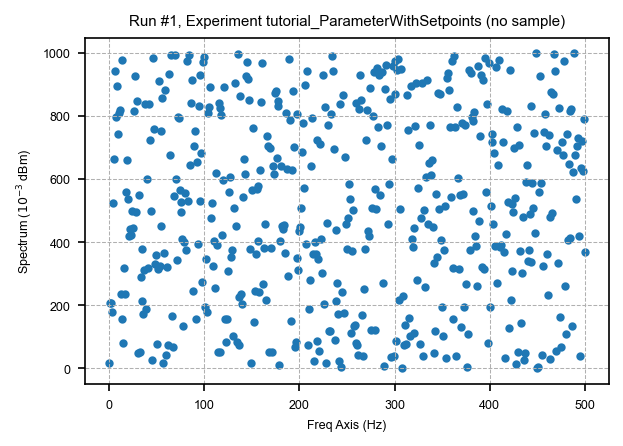

2023-07-24 12:21:36,972 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-07-24 12:21:36,973 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-07-24 12:21:36,975 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-07-24 12:21:36,975 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-07-24 12:21:36,976 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-07-24 12:21:36,977 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-07-24 12:21:36,978 ¦ matplotlib.font_manager ¦ WARNIN

In [11]:
plot_dataset(dataset)